In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
frame = pd.read_csv('final_data/finalframe.csv',sep=';',index_col=[0])

# Estudo variavel alvo

In [5]:
target = frame.iloc[:,-1].to_frame()

In [6]:
target

,target
2014-10-01,1.244847
2014-11-01,1.507325
2014-12-01,1.719265
2015-01-01,2.549900
2015-02-01,3.274220
...,...
2022-03-01,3.200796
2022-04-01,3.734546
2022-05-01,3.179925
2022-06-01,2.215351


<AxesSubplot:>

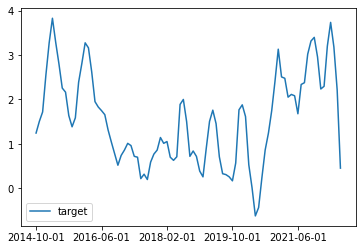

In [7]:
target.plot()

array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

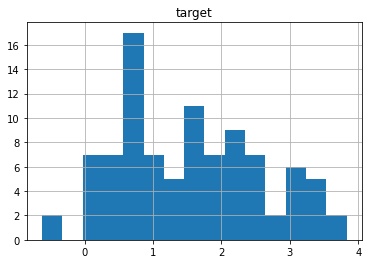

In [8]:
target.hist(bins=15)


([<matplotlib.axis.YTick at 0x7f72edd8e9a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

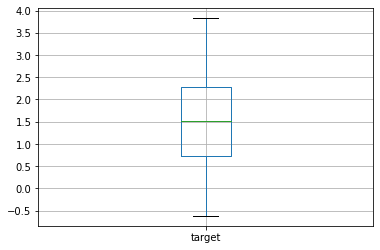

In [9]:
target.boxplot()
plt.yticks(np.arange(-.5,4.5,.5))

In [10]:
target.target

2014-10-01    1.244847
2014-11-01    1.507325
2014-12-01    1.719265
2015-01-01    2.549900
2015-02-01    3.274220
                ...   
2022-03-01    3.200796
2022-04-01    3.734546
2022-05-01    3.179925
2022-06-01    2.215351
2022-07-01    0.455437
Name: target, Length: 94, dtype: float64

In [11]:
df_faixas = pd.cut(target.target,[-np.inf,0,0.75,1.6,2.3,np.inf],labels=['deflacao','baixa','media','alta','muito_alta'])

In [12]:
freq = df_faixas.value_counts().to_frame().loc[['deflacao','baixa','media','alta']]
freq

,target
deflacao,2
baixa,25
media,22
alta,22


<AxesSubplot:>

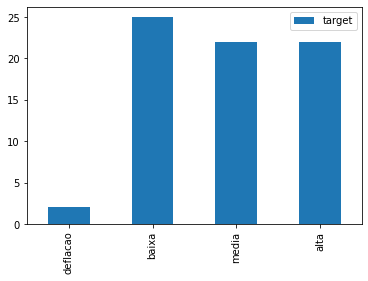

In [13]:
freq.plot(kind='bar')

In [14]:
target.mean() # +- 6.34 % a.a

target    1.552115
dtype: float64

In [15]:
target.describe()

,target
count,94.000000
mean,1.552115
std,1.028754
min,-0.619299
25%,0.720288
50%,1.507102
75%,2.286844
max,3.827718


In [16]:
(target>2.28).sum()

target    24
dtype: int64

In [17]:
# Como apenas 2 vezes foram obtidos resultados negativos, eles serão agregados em períodos de inflação baixa
df_faixas = pd.cut(target.target,[-np.inf,0.75,1.6,2.3,np.inf],labels=['baixa','media','alta','muito_alta'])
freq = df_faixas.value_counts().to_frame().loc[['baixa','media','alta']]
freq

,target
baixa,27
media,22
alta,22


In [18]:
from sklearn.model_selection import train_test_split

In [21]:
X = frame.iloc[:,:113]

In [23]:
y= df_faixas

In [36]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.columns = scaler.get_feature_names_out()

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=.3)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [39]:
model = LogisticRegression(max_iter=100000)

In [40]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=100000)

In [50]:
model.score(X_test,y_test)

0.4827586206896552

In [52]:
model.predict(X_test)

array(['media', 'baixa', 'media', 'alta', 'media', 'baixa', 'baixa',
       'muito_alta', 'baixa', 'alta', 'muito_alta', 'muito_alta', 'baixa',
       'alta', 'media', 'baixa', 'alta', 'media', 'alta', 'baixa',
       'media', 'baixa', 'media', 'muito_alta', 'alta', 'baixa', 'alta',
       'media', 'alta'], dtype=object)

In [53]:
from catboost import CatBoostClassifier

In [95]:
m = CatBoostClassifier(iterations=2000,learning_rate=.01,l2_leaf_reg=10,depth=4)

In [96]:
m.fit(X_train,y_train)

0:	learn: 1.3843458	total: 2.08ms	remaining: 4.16s
1:	learn: 1.3824706	total: 4.67ms	remaining: 4.66s
2:	learn: 1.3803123	total: 6.68ms	remaining: 4.44s
3:	learn: 1.3786193	total: 10ms	remaining: 5s
4:	learn: 1.3768510	total: 13.2ms	remaining: 5.25s
5:	learn: 1.3744996	total: 18ms	remaining: 5.97s
6:	learn: 1.3726643	total: 21.9ms	remaining: 6.22s
7:	learn: 1.3711124	total: 23.9ms	remaining: 5.94s
8:	learn: 1.3692531	total: 27.3ms	remaining: 6.05s
9:	learn: 1.3671632	total: 31.9ms	remaining: 6.34s
10:	learn: 1.3652690	total: 40.3ms	remaining: 7.29s
11:	learn: 1.3634998	total: 43.1ms	remaining: 7.14s
12:	learn: 1.3615323	total: 45.8ms	remaining: 7s
13:	learn: 1.3601990	total: 51.1ms	remaining: 7.24s
14:	learn: 1.3586213	total: 53.7ms	remaining: 7.11s
15:	learn: 1.3568748	total: 57.1ms	remaining: 7.08s
16:	learn: 1.3552466	total: 60.3ms	remaining: 7.04s
17:	learn: 1.3540252	total: 63.8ms	remaining: 7.02s
18:	learn: 1.3518598	total: 67ms	remaining: 6.98s
19:	learn: 1.3496864	total: 69.9ms

In [97]:
m.predict(X_test)

array([['media'],
       ['baixa'],
       ['media'],
       ['muito_alta'],
       ['media'],
       ['baixa'],
       ['baixa'],
       ['muito_alta'],
       ['baixa'],
       ['alta'],
       ['muito_alta'],
       ['muito_alta'],
       ['baixa'],
       ['alta'],
       ['alta'],
       ['baixa'],
       ['alta'],
       ['media'],
       ['muito_alta'],
       ['media'],
       ['media'],
       ['baixa'],
       ['media'],
       ['muito_alta'],
       ['baixa'],
       ['baixa'],
       ['muito_alta'],
       ['alta'],
       ['alta']], dtype=object)

In [98]:
accuracy_score(y_test,m.predict(X_test))

0.6206896551724138